**Pt1_Model_Training:**

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.6808 - loss: 0.8833 - val_accuracy: 0.8616 - val_loss: 0.3710
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.8217 - loss: 0.4866 - val_accuracy: 0.8722 - val_loss: 0.3577
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8494 - loss: 0.4150 - val_accuracy: 0.8868 - val_loss: 0.3067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.8684 - loss: 0.3690 - val_accuracy: 0.8855 - val_loss: 0.3149
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.8753 - loss: 0.3424 - val_accuracy: 0.8969 - val_loss: 0.2899
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8852 - loss: 0.3157 - val_accuracy: 0.8834 - val_loss: 0.3247
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8915 - loss: 0.2997 - val_accuracy: 0.9035 - val_loss: 0.2746
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8952 -

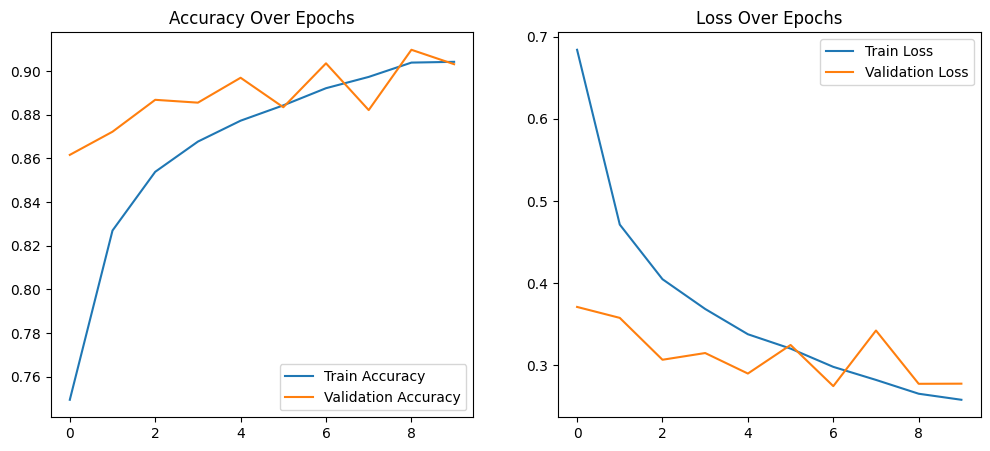

313/313 - 2s - 8ms/step - accuracy: 0.9031 - loss: 0.2776
Test Accuracy: 0.90


In [4]:
# Fashion MNIST CNN Classifier
# CSC 4098
# BY: A.Crawford, J.Dixon, L.Claton, and T.Mack

# 1. Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 2. Load and Preprocess Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape to add channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# 3. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 4. Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 6. Plot Training History
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()

# 7. Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")


**Pt2_Predictions:**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


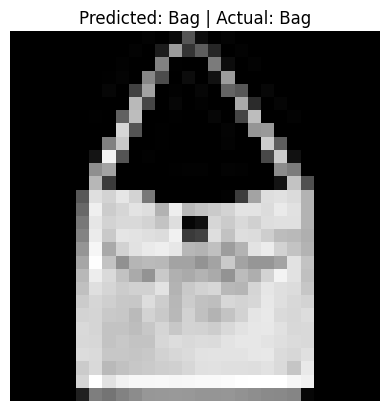

In [6]:
# Label map
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Predict a single image (change the index to try different ones)
index = 700  # THIS
image = test_images[index]
label = test_labels[index]

# Predict
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

# Plot the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_label]} | Actual: {class_names[label]}")
plt.axis('off')
plt.show()
